In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy as np
import pandas as pd
import torch
import re
from sklearn.metrics import balanced_accuracy_score, roc_auc_score,accuracy_score,precision_recall_fscore_support
from Constants import *
from Preprocessing import *
from Models import *
import copy
from Utils import *
pd.set_option('display.max_rows', 200)


In [14]:
pd.read_csv('../data/digital_twin_ln_monograms.csv')

,id,L1A,L1B,L2A,L2B,L3,L4,L5A,L5B,L6,...,R1A,R1B,R2A,R2B,R3,R4,R5A,R5B,R6,RRPLN
0,3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,10201,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532,10202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
533,10203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
534,10204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
data = DTDataset(use_smote=False)
data.processed_df.T
# data.processed_df#.shape, len(data.processed_df.index.unique())

id,3,5,6,7,8,9,10,11,13,14,...,10196,10197,10198,10199,10200,10201,10202,10203,10204,10205
hpv,1,0,1,1,1,1,-1,1,0,1,...,0,1,-1,0,1,1,0,1,0,1
age,55.969444,20.95,69.930556,72.319444,59.730556,60.083333,67.708333,57.858333,51.758333,56.25,...,47.619444,50.163889,70.888889,67.825,56.336111,49.566667,48.705556,77.116667,45.95,49.733333
packs_per_year,0.0,38.0,35.0,0.0,0.0,0.0,40.0,44.0,0.0,40.0,...,5.0,0.0,50.0,0.0,0.0,30.0,30.0,0.0,5.0,0.0
gender,1,1,0,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,1,1,1
Aspiration rate Pre-therapy,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
total_dose,66.0,72.0,70.0,70.0,66.0,66.0,69.96,70.0,70.0,70.0,...,70.0,72.0,66.0,70.0,69.96,70.0,72.0,70.0,69.96,69.96
dose_fraction,2.2,1.8,2.121212,2.121212,2.2,2.2,2.12,2.121212,2.0,2.121212,...,2.121212,1.8,2.2,2.121212,2.12,2.121212,1.714286,2.333333,2.12,2.12
OS (Calculated),6.033333,7.333333,7.466667,7.8,8.066667,8.733333,9.1,9.8,10.033333,10.033333,...,139.033333,139.3,140.6,142.833333,143.033333,143.2,144.366667,148.366667,152.6,155.533333
Locoregional control (Time),4.7,7.333333,7.466667,7.8,8.066667,8.733333,6.7,8.5,10.033333,10.033333,...,139.033333,139.3,140.6,142.833333,143.033333,143.2,144.366667,148.366667,152.6,155.533333
FDM (months),6.033333,7.333333,7.466667,7.8,8.066667,6.633333,9.1,9.8,10.033333,10.033333,...,139.033333,139.3,140.6,142.833333,143.033333,143.2,144.366667,136.033333,152.6,155.533333


In [16]:
def state_loss(ytrue,ypred,subweights=None,weights=None):
    if weights is None:
        weights = [1,1,1,1]
    if subweights is None:
        subweights = [None,None,None]
    pd_loss = torch.mul(mc_loss(ytrue[0],ypred[0],weights=subweights[0]),weights[0])
    nd_loss = torch.mul(mc_loss(ytrue[1],ypred[1],weights=subweights[1]),weights[1])
    mod_loss = torch.mul(mc_loss(ytrue[2],ypred[2],weights=subweights[2]),weights[2])
    loss = torch.add(pd_loss,torch.add(nd_loss,mod_loss))
    dlt_true = ytrue[3]
    dlt_pred = ypred[3]
    ndlt = dlt_true.shape[1]
#     nloss = torch.nn.NLLLoss()
    bce = torch.nn.BCELoss()
    for i in range(ndlt):
        dlt_loss = bce(dlt_pred[:,i].view(-1),dlt_true[:,i].view(-1))
        dlt_loss = torch.mul(dlt_loss,weights[3]/ndlt)
        loss = torch.add(loss,dlt_loss)
    return loss

def outcome_loss(ytrue,ypred,weights=None,**kwargs):
    if weights is None:
        weights = [1,1,1,1]
    loss = 0
    nloss = torch.nn.BCELoss()
    for i in range(len(weights)):
        iloss = nloss(ypred[:,i],ytrue[i])*weights[i]
        loss += iloss
    return loss

In [22]:
def train_state(model=None,
                model_args={},
                state=1,
                split=.7,
                lr=.001,
                epochs=1000,
                patience=10,
                weights=None,
                save_path='../data/models/',
                use_default_split=True,
                use_bagging_split=False,
                resample_training=False,#use bootstraping on training data after splitting
                n_validation_trainsteps=2,
                verbose=True,
                balanced=True,
                sqrt_balance_weights=False,
                use_smote=False,
                smote_cols = None,
                file_suffix=''):
    
    ids = get_dt_ids()
    
    train_ids, test_ids = get_tt_split(use_default_split=use_default_split,use_bagging_split=use_bagging_split,resample_training=resample_training)

    if use_smote:
        if smote_cols is None:
            smote_cols = Const.outcomes
            if state == 1:
                smote_cols = Const.primary_disease_states
            elif state == 2:
                smote_cols = Const.primary_disease_states2
        dataset = DTDataset(use_smote=True,smote_ids = train_ids,smote_columns=[Const.decisions[state-1]])
        train_ids = [i for i in dataset.processed_df.index.values if i not in test_ids]
    else:
        dataset = DTDataset()
    
    #only train on people with  IC for state 1 since other people can't have any outcomes otherwise
    require = None
    if state == 1:
        require = Const.decisions[0] #we don't expect a state update if there is no treatment
        valid_ids = dataset.get_input_state(require=require).index.values
        train_ids = [t for t in train_ids if t in valid_ids]
        test_ids = [t for t in test_ids if t in valid_ids]
    xtrain = dataset.get_input_state(step=state,ids=train_ids,require=require)
    xtest = dataset.get_input_state(step=state,ids=test_ids,require=require)
    ytrain = dataset.get_intermediate_outcomes(step=state,ids=train_ids,require=require)
    ytest = dataset.get_intermediate_outcomes(step=state,ids=test_ids,require=require)
    
    model_args = {k:v for k,v in model_args.items() if 'attention' not in k and 'embed_size' not in k}
    if state < 3:
        if model is None:
                model = BayesianOutcomeSimulator(xtrain.shape[1],state=state,**model_args)
        lfunc = state_loss
        if weights is None:
            weights = [1,1,.1,1]
    else:
        if model is None:
                model = BayesianEndpointSimulator(xtrain.shape[1],**model_args)
        if weights is None:
            weights = [1,1,1,1]
        lfunc = outcome_loss
    print(model.passthrough)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model.set_device(device)
    
    balance_weights=None
    if balanced:
        if state < 3:
            balance_weights = [w.to(device) for w in get_weights(ytrain)]
            if sqrt_balance_weights:
                balance_weights = [torch.sqrt(w) for w in balance_weights]
        else:
            print('I dont do balancing on the outputs because Idk how that would work')
    
    hashcode = str(hash(','.join([str(i) for i in train_ids])))
    save_file = save_path + 'model_' + model.identifier + '_split' + str(split) + '_resample' + str(resample_training) +  '_hash' + hashcode + file_suffix + '.tar'
    xtrain = df_to_torch(xtrain).to(device)
    
    xtest = df_to_torch(xtest).to(device)
    ytrain = [df_to_torch(t).to(device) for t in ytrain]
    ytest= [df_to_torch(t).to(device) for t in ytest]
    
    model.fit_normalizer(xtrain)
    
    optimizer = torch.optim.Adam(model.parameters(),lr=lr)
    best_val_loss = 1000000000000000000000000000
    best_loss_metrics = {}
    last_epoch = False
    for epoch in range(epochs):
        
        model.train(True)
        optimizer.zero_grad()
        
        xtrain_sample = xtrain#[torch.randint(len(xtrain),(len(xtrain),) )]
        ypred = model(xtrain_sample,n_samples=1)
        loss = lfunc(ytrain,ypred,weights=weights,subweights=balance_weights)

        loss.backward()
        optimizer.step()
        if verbose:
            print('epoch',epoch,'train loss',loss.item())
        
        model.eval()
        yval = model(xtest,n_samples=1)
        val_loss = lfunc(ytest,yval,weights=weights,subweights=balance_weights)
        if state < 3:
            val_metrics = state_metrics(ytest,yval)
        else:
            val_metrics = outcome_metrics(ytest,yval)
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_loss_metrics = val_metrics
            steps_since_improvement = 0
            torch.save(model.state_dict(),save_file)
        else:
            steps_since_improvement += 1
        if verbose:
            print('val loss',val_loss.item())
            print('______________')
        if steps_since_improvement > patience:
            break
    print('best loss',best_val_loss,best_loss_metrics)
    model.load_state_dict(torch.load(save_file))
    
    #train one step on validation data
    for i in range(n_validation_trainsteps):
        model.train()
        yval = model(xtest,n_samples=1)
        val_loss = lfunc(ytest,yval,weights=weights)
        val_loss.backward()
        optimizer.step()
        torch.save(model.state_dict(),save_file)
    
    model.eval()
    print(model(xtest))
    return model,  best_val_loss, best_loss_metrics

from Models import *
t1_args = {'hidden_layers': [500,500],
   'dropout': 0.5,
   'input_dropout': 0.1}

In [29]:
tmodel1 = train_state(model_args=t1_args,state=1,lr=.0001,weights=[1,1,.1,1],balanced=False)
tmodel2 = train_state(model_args=t1_args,state=2,lr=.001,weights=[1,1,.01,1],balanced=False)
tmodel3 = train_state(model_args=t1_args,state=3,lr=.0001,weights=[.01,1,1,.01],balanced=False)

True
epoch 0 train loss 3.1089203357696533
val loss 3.089024305343628
______________
epoch 1 train loss 3.090198516845703
val loss 3.0738937854766846
______________
epoch 2 train loss 3.075803279876709
val loss 3.059108257293701
______________
epoch 3 train loss 3.059760570526123
val loss 3.0445594787597656
______________
epoch 4 train loss 3.0426509380340576
val loss 3.030261993408203
______________
epoch 5 train loss 3.025984048843384
val loss 3.0161707401275635
______________
epoch 6 train loss 3.0113718509674072
val loss 3.002207040786743
______________
epoch 7 train loss 2.9959423542022705
val loss 2.9883689880371094
______________
epoch 8 train loss 2.987455129623413
val loss 2.9746251106262207
______________
epoch 9 train loss 2.969301223754883
val loss 2.960928440093994
______________
epoch 10 train loss 2.9490649700164795
val loss 2.947267532348633
______________
epoch 11 train loss 2.933465003967285
val loss 2.9336001873016357
______________
epoch 12 train loss 2.921452045440

val loss 2.2552742958068848
______________
epoch 104 train loss 2.1287736892700195
val loss 2.2538623809814453
______________
epoch 105 train loss 2.140918254852295
val loss 2.2525277137756348
______________
epoch 106 train loss 2.1119980812072754
val loss 2.251253128051758
______________
epoch 107 train loss 2.12934947013855
val loss 2.249966621398926
______________
epoch 108 train loss 2.1184017658233643
val loss 2.248675584793091
______________
epoch 109 train loss 2.1207916736602783
val loss 2.2473886013031006
______________
epoch 110 train loss 2.130406618118286
val loss 2.246168613433838
______________
epoch 111 train loss 2.1298511028289795
val loss 2.245032787322998
______________
epoch 112 train loss 2.1209909915924072
val loss 2.2440061569213867
______________
epoch 113 train loss 2.1026666164398193
val loss 2.243009567260742
______________
epoch 114 train loss 2.1051266193389893
val loss 2.24204683303833
______________
epoch 115 train loss 2.095785617828369
val loss 2.241152

True
epoch 0 train loss 2.770620822906494
val loss 2.646031379699707
______________
epoch 1 train loss 2.613647699356079
val loss 2.4917407035827637
______________
epoch 2 train loss 2.463515043258667
val loss 2.3385586738586426
______________
epoch 3 train loss 2.312943935394287
val loss 2.1968295574188232
______________
epoch 4 train loss 2.1707050800323486
val loss 2.0781571865081787
______________
epoch 5 train loss 2.045783758163452
val loss 1.9903271198272705
______________
epoch 6 train loss 1.952778697013855
val loss 1.9348293542861938
______________
epoch 7 train loss 1.8975263833999634
val loss 1.906714916229248
______________
epoch 8 train loss 1.876177191734314
val loss 1.8978559970855713
______________
epoch 9 train loss 1.8516558408737183
val loss 1.9025228023529053
______________
epoch 10 train loss 1.8508214950561523
val loss 1.9120203256607056
______________
epoch 11 train loss 1.8415230512619019
val loss 1.9179857969284058
______________
epoch 12 train loss 1.84956121

True
epoch 0 train loss 1.3524889945983887
val loss 1.3160619735717773
______________
epoch 1 train loss 1.3234766721725464
val loss 1.293525218963623
______________
epoch 2 train loss 1.2975603342056274
val loss 1.2724660634994507
______________
epoch 3 train loss 1.2733924388885498
val loss 1.2527824640274048
______________
epoch 4 train loss 1.2478766441345215
val loss 1.2343631982803345
______________
epoch 5 train loss 1.2249008417129517
val loss 1.2171833515167236
______________
epoch 6 train loss 1.2097082138061523


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 1.2011921405792236
______________
epoch 7 train loss 1.1879054307937622
val loss 1.1863157749176025
______________
epoch 8 train loss 1.1765697002410889
val loss 1.172552227973938
______________
epoch 9 train loss 1.1535637378692627
val loss 1.159826636314392
______________
epoch 10 train loss 1.1369928121566772
val loss 1.1481467485427856
______________
epoch 11 train loss 1.1241917610168457
val loss 1.1373729705810547
______________
epoch 12 train loss 1.1252955198287964
val loss 1.1275112628936768
______________
epoch 13 train loss 1.0945945978164673


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 1.1184537410736084
______________
epoch 14 train loss 1.0925630331039429
val loss 1.1101586818695068
______________
epoch 15 train loss 1.0894838571548462
val loss 1.1025452613830566
______________
epoch 16 train loss 1.0678359270095825
val loss 1.095573902130127
______________
epoch 17 train loss 1.061303734779358
val loss 1.0891977548599243
______________
epoch 18 train loss 1.0511194467544556
val loss 1.0833446979522705
______________
epoch 19 train loss 1.0417181253433228
val loss 1.077958106994629
______________
epoch 20 train loss 1.0333260297775269


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 1.0730006694793701
______________
epoch 21 train loss 1.0329692363739014
val loss 1.068434238433838
______________
epoch 22 train loss 1.0170905590057373
val loss 1.0641865730285645
______________
epoch 23 train loss 1.009649395942688
val loss 1.0602003335952759
______________
epoch 24 train loss 1.0000255107879639
val loss 1.0564231872558594
______________
epoch 25 train loss 0.9984813332557678
val loss 1.0528030395507812
______________
epoch 26 train loss 0.9924352765083313
val loss 1.049332857131958
______________
epoch 27 train loss 0.9875756502151489


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 1.045973300933838
______________
epoch 28 train loss 0.9982088804244995
val loss 1.0426499843597412
______________
epoch 29 train loss 0.9702125787734985
val loss 1.0393575429916382
______________
epoch 30 train loss 0.9652111530303955
val loss 1.0360535383224487
______________
epoch 31 train loss 0.9706887006759644
val loss 1.0327140092849731
______________
epoch 32 train loss 0.9528151750564575
val loss 1.0293232202529907
______________
epoch 33 train loss 0.9518835544586182
val loss 1.0259020328521729
______________
epoch 34 train loss 0.9407356381416321


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 1.0223841667175293
______________
epoch 35 train loss 0.9363009929656982
val loss 1.0187749862670898
______________
epoch 36 train loss 0.9341527223587036
val loss 1.0150552988052368
______________
epoch 37 train loss 0.9241961240768433
val loss 1.0113110542297363
______________
epoch 38 train loss 0.9211524724960327
val loss 1.0074834823608398
______________
epoch 39 train loss 0.9310006499290466
val loss 1.0035711526870728
______________
epoch 40 train loss 0.9282529354095459
val loss 0.999577522277832
______________
epoch 41 train loss 0.9070168137550354


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.9955483078956604
______________
epoch 42 train loss 0.9004334807395935
val loss 0.9915109276771545
______________
epoch 43 train loss 0.896776020526886
val loss 0.9874259829521179
______________
epoch 44 train loss 0.8889603018760681
val loss 0.9832972884178162
______________
epoch 45 train loss 0.8892372250556946
val loss 0.979195237159729
______________
epoch 46 train loss 0.8778371810913086
val loss 0.9751320481300354
______________
epoch 47 train loss 0.87298184633255
val loss 0.9710700511932373
______________
epoch 48 train loss 0.8597672581672668


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.9670552611351013
______________
epoch 49 train loss 0.8632417917251587
val loss 0.9630846977233887
______________
epoch 50 train loss 0.8522483110427856
val loss 0.9591661095619202
______________
epoch 51 train loss 0.8565943837165833
val loss 0.9552943706512451
______________
epoch 52 train loss 0.8317573070526123
val loss 0.9515126347541809
______________
epoch 53 train loss 0.8311267495155334
val loss 0.947776734828949
______________
epoch 54 train loss 0.8250111937522888
val loss 0.944101095199585
______________
epoch 55 train loss 0.8325064182281494


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.9405030012130737
______________
epoch 56 train loss 0.8303284049034119
val loss 0.9369845986366272
______________
epoch 57 train loss 0.8296439051628113
val loss 0.9335669875144958
______________
epoch 58 train loss 0.810342013835907
val loss 0.9303203225135803
______________
epoch 59 train loss 0.8022630214691162
val loss 0.9271591901779175
______________
epoch 60 train loss 0.8104680776596069
val loss 0.9240767955780029
______________
epoch 61 train loss 0.8092033267021179
val loss 0.9210960268974304
______________
epoch 62 train loss 0.7922664284706116


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.918224036693573
______________
epoch 63 train loss 0.7815719842910767
val loss 0.9154922962188721
______________
epoch 64 train loss 0.789742112159729
val loss 0.9129021763801575
______________
epoch 65 train loss 0.7746260166168213
val loss 0.910434901714325
______________
epoch 66 train loss 0.7773033976554871
val loss 0.9080790281295776
______________
epoch 67 train loss 0.7753667235374451
val loss 0.9058899879455566
______________
epoch 68 train loss 0.7662243843078613
val loss 0.9038423299789429
______________
epoch 69 train loss 0.7642493844032288


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.9019057154655457
______________
epoch 70 train loss 0.7583731412887573
val loss 0.9000986814498901
______________
epoch 71 train loss 0.7437034249305725
val loss 0.8984647989273071
______________
epoch 72 train loss 0.7428948879241943
val loss 0.896943211555481
______________
epoch 73 train loss 0.7494047284126282
val loss 0.895521342754364
______________
epoch 74 train loss 0.7411271333694458
val loss 0.8941447734832764
______________
epoch 75 train loss 0.7401046752929688
val loss 0.8928546905517578
______________
epoch 76 train loss 0.7322660684585571


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.8915862441062927
______________
epoch 77 train loss 0.723181426525116
val loss 0.8904537558555603
______________
epoch 78 train loss 0.7328161001205444
val loss 0.8894977569580078
______________
epoch 79 train loss 0.7312376499176025
val loss 0.8886361718177795
______________
epoch 80 train loss 0.713042140007019
val loss 0.8878398537635803
______________
epoch 81 train loss 0.7130254507064819
val loss 0.8871067762374878
______________
epoch 82 train loss 0.7261587977409363
val loss 0.8864225149154663
______________
epoch 83 train loss 0.7012132406234741


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


val loss 0.8858667016029358
______________
epoch 84 train loss 0.7055099010467529
val loss 0.8853374123573303
______________
epoch 85 train loss 0.6926074624061584
val loss 0.8849053382873535
______________
epoch 86 train loss 0.7002604007720947
val loss 0.8844909071922302
______________
epoch 87 train loss 0.6948884129524231
val loss 0.8841630816459656
______________
epoch 88 train loss 0.6801552772521973
val loss 0.8838987350463867
______________
epoch 89 train loss 0.6911271810531616
val loss 0.8836938738822937
______________
epoch 90 train loss 0.6816788911819458
val loss 0.8835814595222473
______________
epoch 91 train loss 0.6669741272926331
val loss 0.8835199475288391
______________
epoch 92 train loss 0.6744834184646606
val loss 0.8835222721099854
______________
epoch 93 train loss 0.6818958520889282
val loss 0.8835060000419617
______________
epoch 94 train loss 0.6709802746772766
val loss 0.8835158348083496
______________
epoch 95 train loss 0.6663404107093811
val loss 0.88346

In [33]:
#model performance measures
tmodel1[-1],  tmodel2[-1], tmodel3[-1],

({'pd': {'accuracy': 0.4171428571428571,
   'auc_micro': 0.806436041834272,
   'auc_mean': 0.6417870517413685,
   'auc_weighted': 0.6909266442416482},
  'nd': {'accuracy': 0.3333333333333333,
   'auc_micro': 0.8461786001609009,
   'auc_mean': 0.45077693205641317,
   'auc_weighted': 0.5218910806174957},
  'mod': {'accuracy': 0.3333333333333333,
   'auc_micro': 0.8461786001609009,
   'auc_mean': 0.45077693205641317,
   'auc_weighted': 0.5218910806174957},
  'dlts': {'accuracy': [0.9464285714285714,
    0.7857142857142857,
    0.9107142857142857,
    0.8035714285714286,
    0.8928571428571429],
   'accuracy_mean': 0.8678571428571429,
   'auc': [0.48427672955974843,
    0.6098484848484849,
    0.580392156862745,
    0.5818181818181818,
    0.5],
   'auc_mean': 0.5512671106178321}},
 {'pd': {'accuracy': 0.3333333333333333,
   'auc_micro': 0.8995978301533857,
   'auc_mean': 0.5815928062247769,
   'auc_weighted': 0.6224801228475985},
  'nd': {'accuracy': 0.3530671859785784,
   'auc_micro': 0.

In [28]:
#save models to resources
tmodel1[0].set_device('cpu')
tmodel2[0].set_device('cpu')
tmodel3[0].set_device('cpu')

torch.save(tmodel1[0],'../resources/transition1_model.pt')
torch.save(tmodel2[0],'../resources/transition2_model.pt')
torch.save(tmodel3[0],'../resources/outcome_model.pt')

In [ ]:
#code below was for generating figures for the paper

In [16]:
def merge_tmodel_results(t1,t2,t3):
    r1 = t1[-1]
    r2 = t2[-1]
    r3 = t3[-1]
    res_list = []
    for state, result in enumerate([r1,r2,r3]):
        for outcome, metricdict in result.items():
            if outcome == 'dlts':
                for metric, values in metricdict.items():
                    try:
                        for dltname, value in zip(Const.dlt1,values):
                            entry = {
                                'state': state + 1,
                                'outcome': dltname,
                                'metric': metric,
                                'value': value,
                            }
                            res_list.append(entry)
                    except:
                        entry = {
                            'state': state + 1,
                            'outcome': outcome,
                            'metric': metric,
                            'value': values
                        }
                        res_list.append(entry)
            else:
                for metric, value in metricdict.items():
                    entry = {
                        'state': state + 1,
                        'outcome': outcome,
                        'metric': metric,
                        'value': value
                    }
                    res_list.append(entry)
    return pd.DataFrame(res_list)
import time
model_results = merge_tmodel_results(tmodel1,tmodel2,tmodel3_balanced)
model_results.to_csv('../results/transition_models_' + str(time.time()) + '.csv')
model_results_balanced = merge_tmodel_results(tmodel_balanced,tmodel2_balanced,tmodel3_balanced)
model_results_balanced

,state,outcome,metric,value
0,1,pd,accuracy,0.309524
1,1,pd,auc_micro,0.582784
2,1,pd,auc_mean,0.507796
3,1,pd,auc_weighted,0.538749
4,1,nd,accuracy,0.296296
5,1,nd,auc_micro,0.160901
6,1,nd,auc_mean,0.415167
7,1,nd,auc_weighted,0.337500
8,1,mod,accuracy,0.296296
9,1,mod,auc_micro,0.160901


In [11]:
model_results = pd.read_csv('../results/transition_models_1707154400.3358104.csv').drop('Unnamed: 0',axis=1)
model_results

,state,outcome,metric,value
0,1,pd,accuracy,0.403810
1,1,pd,auc_micro,0.800644
2,1,pd,auc_mean,0.633586
3,1,pd,auc_weighted,0.673876
4,1,nd,accuracy,0.333333
5,1,nd,auc_micro,0.853097
6,1,nd,auc_mean,0.478223
7,1,nd,auc_weighted,0.533205
8,1,mod,accuracy,0.333333
9,1,mod,auc_micro,0.853097


In [1]:
from matplotlib.container import BarContainer
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
def plot_mc_results(mr,title='Model Performance for Multiclass Outcomes'):
    temp = mr.copy()
    temp['title'] = temp['outcome'] + temp['state'].astype(str)
    temp = temp.groupby('title').filter(lambda x: x[x.metric == 'auc_micro'].shape[0] > 0).reset_index()
    metrics = set(['auc_mean','accuracy','auc_micro','auc_weighted'])
    temp = temp[temp.metric.apply(lambda x: x in metrics)]
    temp = temp[temp.outcome.apply(lambda x: x not in ['Overall Survival (4 Years)', 'LRC'])]
    fig,ax = plt.subplots(1,1,figsize=(5,8))
    sns.barplot(
        data=temp,
        y='title',
        x='value',
        orient='h',
        hue='metric',
        ax=ax,
        palette='colorblind',
    )
    ax.set_title(title)
    ax.set_ylabel('Outcome')
    ax.set_xlabel('')
    ax.axvline(.5,c='white')
    ax.axvline(.75,c='white')
    ax.axvline(.25,c="white")
    ax.set_xlim(0,1)
    ax.set_xticks([.25,.5,.75])
    for container in ax.containers:
        for patch,value in zip(container.patches,container.datavalues):
            x,y = patch.xy
            x = x + patch._width
            y = y + (patch._height/2)
            value = np.round(value,2)
            ax.text(x,y,str(value),verticalalignment='center')

plot_mc_results(model_results)

NameError: name 'model_results' is not defined

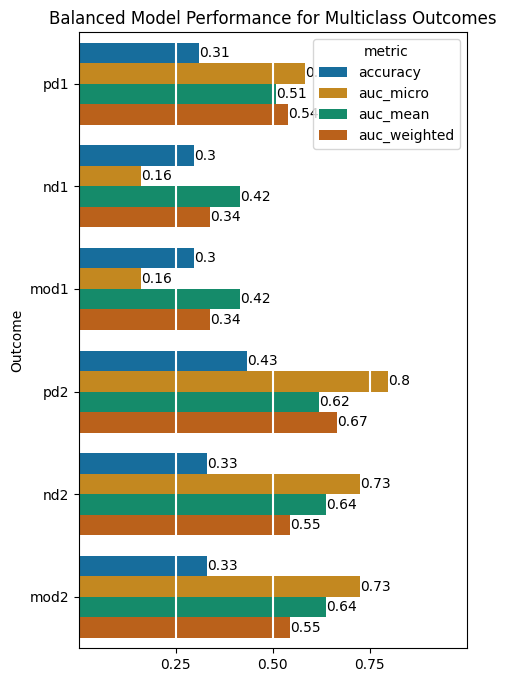

In [18]:
plot_mc_results(model_results_balanced,title="Balanced Model Performance for Multiclass Outcomes")

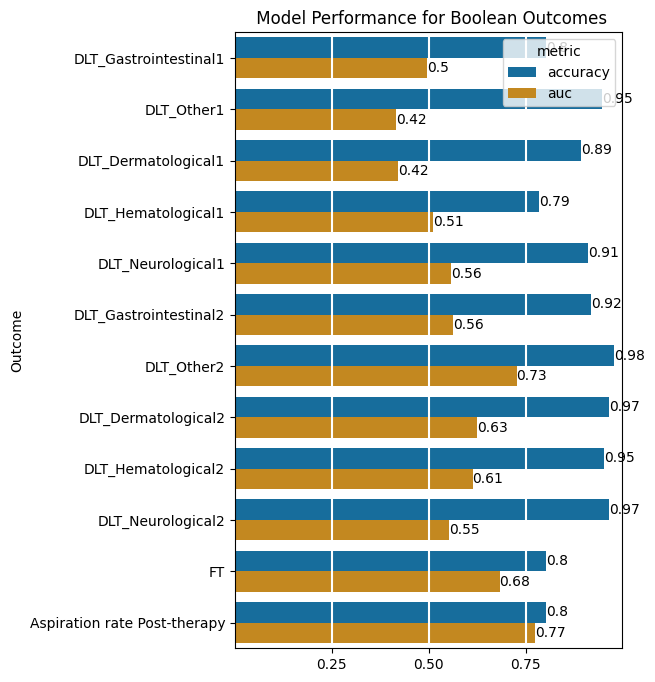

In [19]:
def plot_bool_results(mr,model_name=''):
    temp = mr.copy()
    temp['title'] = temp['outcome'] + temp['state'].apply(lambda x: str(x) if x < 3 else '')
    temp = temp.groupby('title').filter(lambda x: x[x.metric == 'auc'].shape[0] > 0).reset_index()
    metrics = set(['auc','accuracy'])
    temp = temp[temp.metric.apply(lambda x: x in metrics)]
    temp = temp[temp.outcome.apply(lambda x: x not in ['Overall Survival (4 Years)', 'LRC'])]
    fig,ax = plt.subplots(1,1,figsize=(5,8))
    sns.barplot(
        data=temp,
        y='title',
        x='value',
        orient='h',
        hue='metric',
        ax=ax,
        palette='colorblind',
    )
    ax.set_title(model_name + ' Model Performance for Boolean Outcomes')
    ax.set_ylabel('Outcome')
    ax.set_xlabel('')
    ax.axvline(.5,c='white')
    ax.axvline(.75,c='white')
    ax.axvline(.25,c="white")
    ax.set_xticks([.25,.5,.75])
    ax.set_xlim(0,1)
    for container in ax.containers:
        for patch,value in zip(container.patches,container.datavalues):
            x,y = patch.xy
            x = x + patch._width
            y = y + (patch._height/2)
            value = np.round(value,2)
            ax.text(x,y,str(value),verticalalignment='center')
plot_bool_results(model_results)

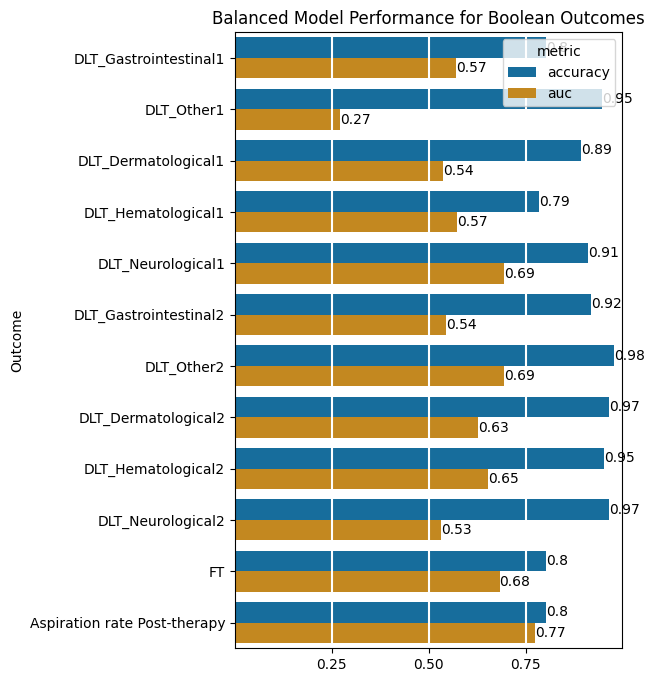

In [20]:
plot_bool_results(model_results_balanced,'Balanced')

In [2]:
model_results

NameError: name 'model_results' is not defined

0
Axes(0.125,0.653529;0.0407895x0.226471)
1
Axes(0.173947,0.653529;0.0407895x0.226471)
2
Axes(0.222895,0.653529;0.0407895x0.226471)
3
Axes(0.271842,0.653529;0.0407895x0.226471)
4
Axes(0.320789,0.653529;0.0407895x0.226471)
5
Axes(0.369737,0.653529;0.0407895x0.226471)
6
Axes(0.418684,0.653529;0.0407895x0.226471)
7
Axes(0.467632,0.653529;0.0407895x0.226471)
8
Axes(0.516579,0.653529;0.0407895x0.226471)
9
Axes(0.565526,0.653529;0.0407895x0.226471)
10
Axes(0.614474,0.653529;0.0407895x0.226471)
11
Axes(0.663421,0.653529;0.0407895x0.226471)
12
Axes(0.712368,0.653529;0.0407895x0.226471)
13
Axes(0.761316,0.653529;0.0407895x0.226471)
14
Axes(0.810263,0.653529;0.0407895x0.226471)
15
Axes(0.859211,0.653529;0.0407895x0.226471)
0
Axes(0.125,0.381765;0.0407895x0.226471)
1
Axes(0.173947,0.381765;0.0407895x0.226471)
2
Axes(0.222895,0.381765;0.0407895x0.226471)
3
Axes(0.271842,0.381765;0.0407895x0.226471)
4
Axes(0.320789,0.381765;0.0407895x0.226471)
5
Axes(0.369737,0.381765;0.0407895x0.226471)
6
Axes(0.4

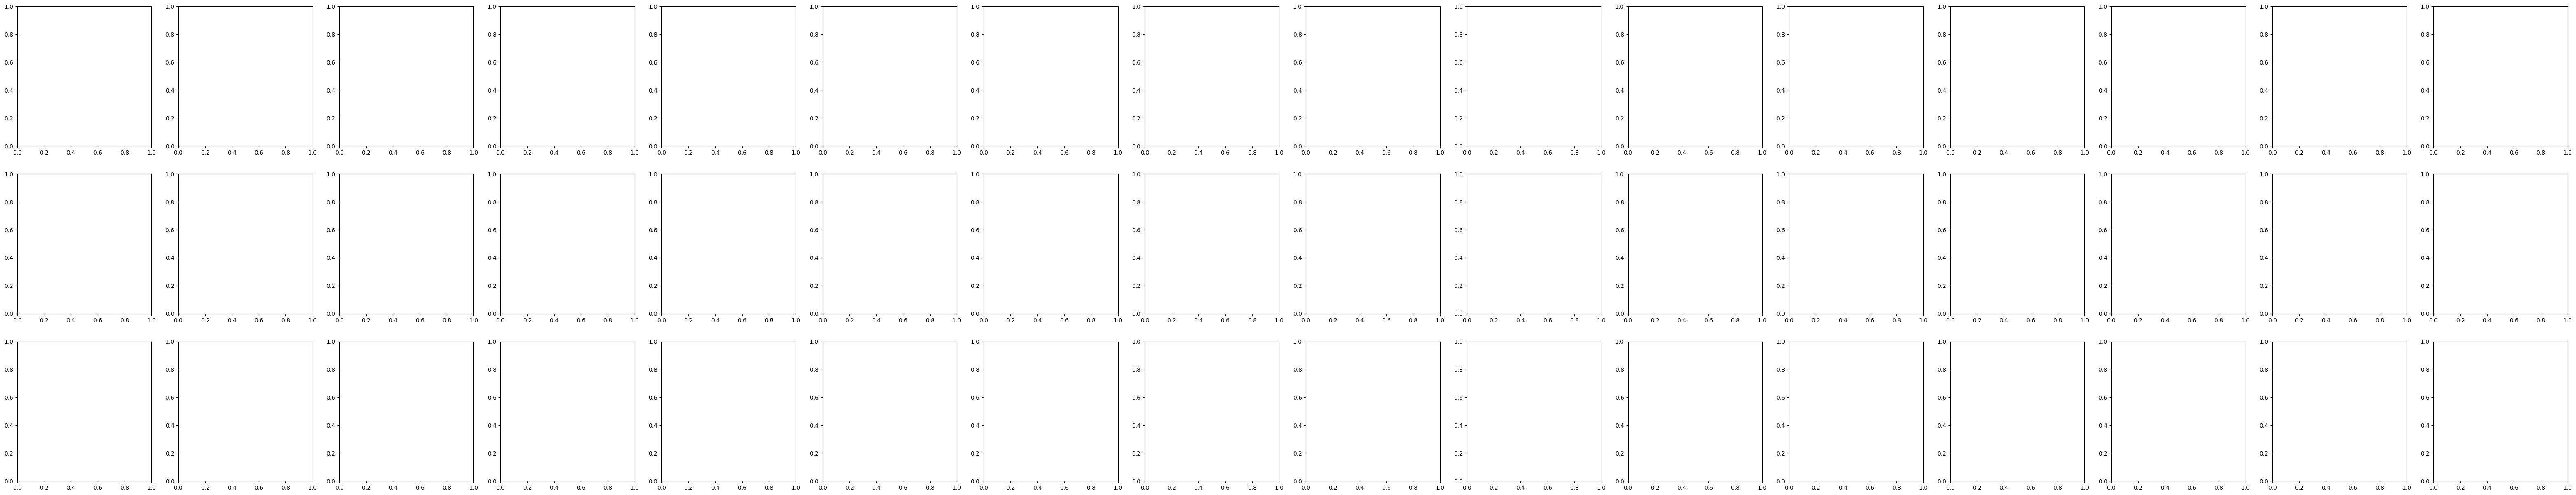

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
metrics = set(['auc','accuracy','f1','auc_weighted'])
subdf = model_results[model_results.metric.apply(lambda x: x in metrics)]
lengths = [subdf[subdf.state == i+1].shape[0] for i in range(3)]
fig, axes = plt.subplots(3,max(lengths),figsize=(5*max(lengths),15))
for i in range(3):
    axx = axes[i]
    subsubdf = subdf[subdf.state == i + 1]
    ii =0
    for iii,row in subsubdf.iterrows():
        ax = axes[i,ii]
        ii += 1
        

In [ ]:
#outdated code for doing an ensembel of stuff instead of using bayesian inference via dropout
def train_model_ensemble(model_arg_list,state,
                         n_bags=20,
                         smote_options=[True,False],
                         smote_baseline_options=[True,False],
                         weight_options=[None],
                         weight_baseline_options=[None],
                         **kwargs):
    resampled_models =[]
    base_models = []
    base_metrics = []
    resample_metrics = []
    base_losses = []
    resample_losses = []
    n_errors = 0
    for margs in model_arg_list:
        for s in smote_baseline_options:
            for w in weight_baseline_options:
                [base_model,blosses,bmetrics] = train_state(model_args=margs,state=state,
                                         resample_training=False,
                                         use_smote=smote_options,
                                         weights=w,
                                         verbose=False,**kwargs)
                base_models.append(base_model)
                base_metrics.append(bmetrics)
                base_losses.append(blosses)
        for n in range(n_bags):
            for s in smote_options:
                for w in weight_options:
                    #this can fail if I resample a bad distribution with no minority classes
                    done = False
                    while not done:
                        try:
                            [model,loss,metrics] = train_state(model_args=margs,
                                                state=state,resample_training=True,
                                                use_smote=s,
                                                weights=w,
                                                verbose=False,**kwargs)
                            resampled_models.append(model)
                            resample_metrics.append(metrics)
                            resample_losses.append(loss)
                            done=True
                            print('model_done',len(base_models)+len(resampled_models))
                        except Exception as e:
                            print('error training model')
                            print(e)
                            n_errors += 1
    print('done with',n_errors,'errors')
    return base_models,resampled_models